In [45]:
import numpy as np
import matplotlib.pyplot as plt
import visualization
import os
from gta_math import points_to_homo, ndc_to_view, construct_proj_matrix, view_to_world, construct_view_matrix, is_entity_in_image
from visualization import load_depth, load_stencil, save_pointcloud_csv, bbox_from_string, draw3dbboxes, draw_one_entity_3dbbox
import progressbar
from joblib import Parallel, delayed
from configparser import ConfigParser
from PIL import Image
import pickle
import json
from datetime import timedelta, datetime, date
from matplotlib.dates import DateFormatter, DateFormatter, HourLocator
import glob

In [46]:
ini_file = "gta-postprocessing.ini"
visualization.multi_page = False
visualization.ini_file = ini_file

conn = visualization.get_connection_pooled()
cur = conn.cursor()

CONFIG = ConfigParser()
CONFIG.read(ini_file)
directory = r'D:\generic-dataset'

In [47]:
def get_base_name(name):
    return os.path.basename(os.path.splitext(name)[0])

pattern = '[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]--[0-9][0-9]-[0-9][0-9]-[0-9][0-9]--[0-9][0-9][0-9].jpg'
files = glob.glob(os.path.join(directory, pattern))
np.random.shuffle(files)

D:\generic-dataset\2018-03-30--05-18-50--842.jpg 2018-03-30--05-18-50--842
camera pos:  [2329.0625, 5208.37890625, 60.1986961364746]


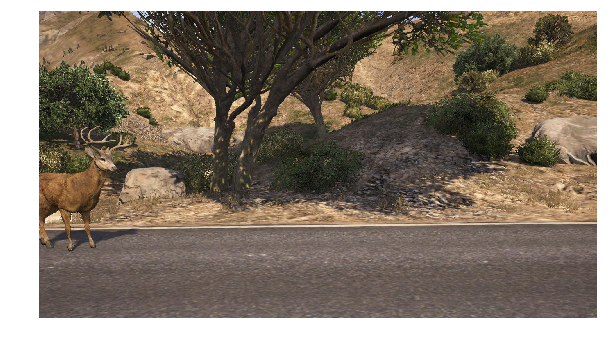

D:\generic-dataset\2018-03-30--01-20-53--620.jpg 2018-03-30--01-20-53--620
camera pos:  [503.243499755859, -1148.59057617188, 29.4699573516846]
2D bbox: [[ 1200.84444146  1053.00095147]
 [  214.21944534   314.1291167 ]]
2D bbox: [[ 1108.45507903   556.41576687]
 [ 1081.75005389   544.51159398]]
2D bbox: [[ 201.71846818  143.16658267]
 [   0.           40.25989389]]
2D bbox: [[ 889.07014291  106.41390468]
 [ 751.3254644     0.        ]]


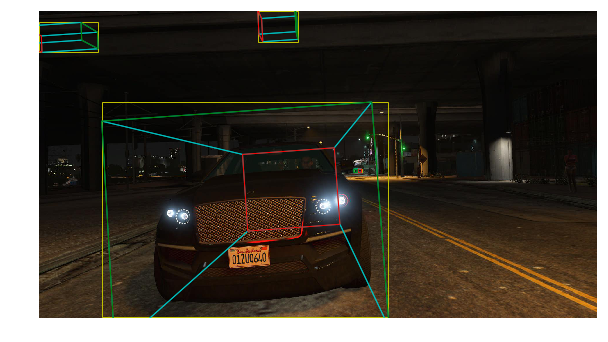

D:\generic-dataset\2018-03-30--08-22-58--159.jpg 2018-03-30--08-22-58--159
camera pos:  [1903.40356445312, 3853.49633789062, 32.5498390197754]
2D bbox: [[ 424.51933268  598.2168953 ]
 [  31.05924913  494.35622486]]


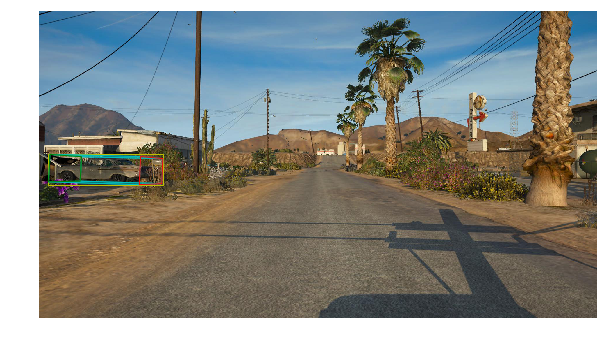

D:\generic-dataset\2018-03-30--07-55-25--210.jpg 2018-03-30--07-55-25--210
camera pos:  [1665.919921875, 3616.142578125, 35.8713150024414]
2D bbox: [[   7.40522981  551.02812449]
 [   0.          534.15230533]]
2D bbox: [[ 1444.76734953   550.19822372]
 [ 1387.53613634   523.35145447]]


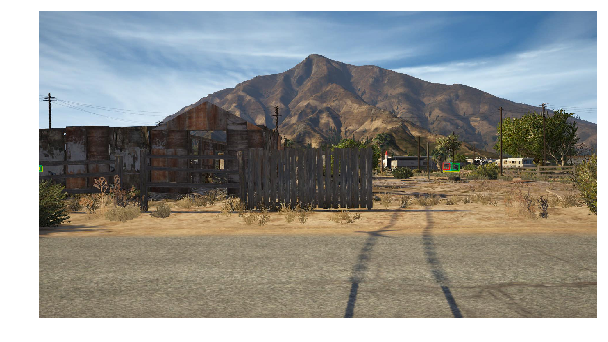

D:\generic-dataset\2018-03-07--15-18-14--238.jpg 2018-03-07--15-18-14--238
camera pos:  [311.489837646484, -1354.46899414062, 31.9382591247559]
2D bbox: [[ 1915.00052274   581.21312849]
 [ 1901.63018009   553.33995405]]


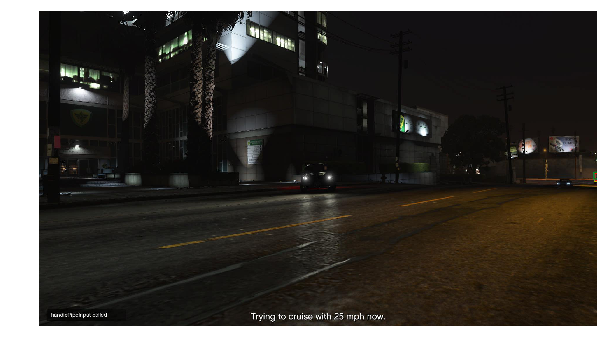

D:\generic-dataset\2018-03-07--17-26-17--109.jpg 2018-03-07--17-26-17--109
camera pos:  [1928.97583007812, -1186.68212890625, 113.609733581543]


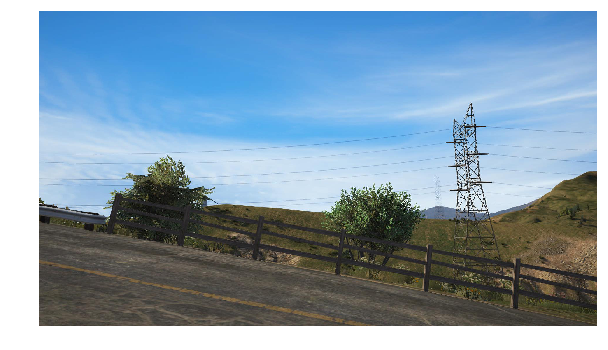

D:\generic-dataset\2018-03-30--08-09-07--722.jpg 2018-03-30--08-09-07--722
camera pos:  [1531.91149902344, 3744.84008789062, 34.8689727783203]


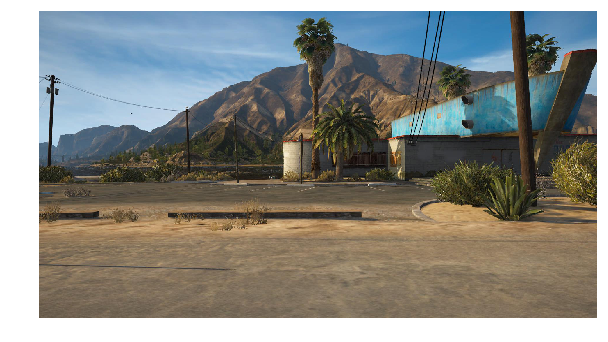

D:\generic-dataset\2018-03-30--04-20-18--524.jpg 2018-03-30--04-20-18--524
camera pos:  [2106.03491210938, 5223.1337890625, 57.1305160522461]
2D bbox: [[ 1194.72991603   436.00632874]
 [ 1119.25886304   388.8832733 ]]
2D bbox: [[ 1141.9582765    439.07560631]
 [ 1066.76332692   390.75734455]]


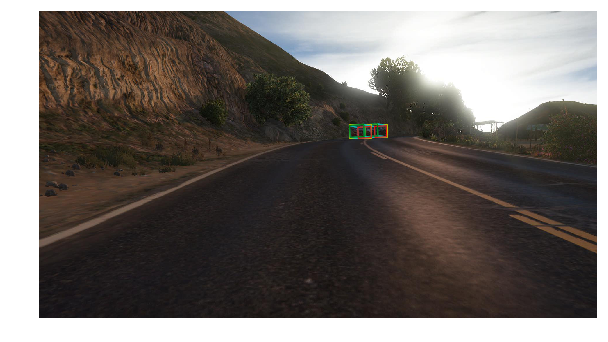

D:\generic-dataset\2018-03-30--10-29-20--661.jpg 2018-03-30--10-29-20--661
camera pos:  [1630.02355957031, 3632.81958007812, 35.3344192504883]


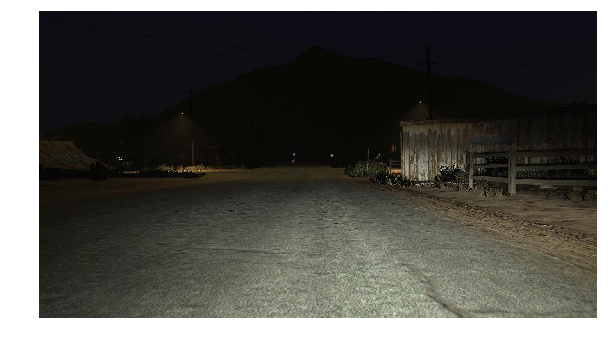

D:\generic-dataset\2018-03-07--16-40-22--769.jpg 2018-03-07--16-40-22--769
camera pos:  [153.642150878906, -1364.86511230469, 28.814079284668]
2D bbox: [[ 1915.00052274   487.45029427]
 [ 1904.15975163   464.58596979]]


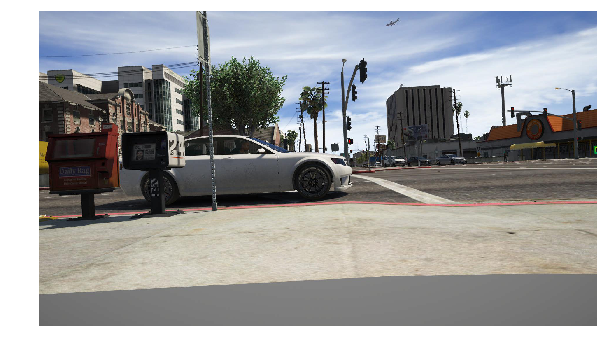

D:\generic-dataset\2018-03-30--01-47-56--981.jpg 2018-03-30--01-47-56--981
camera pos:  [778.122802734375, -747.661376953125, 27.2256851196289]
2D bbox: [[ 920.60361111  550.94803154]
 [ 909.11193078  539.0945543 ]]
2D bbox: [[ 905.79764003  571.85998865]
 [ 883.0026718   552.94309719]]
2D bbox: [[   5.85891605  515.20843082]
 [   0.          502.05255912]]
2D bbox: [[ 1016.28789927   573.32074593]
 [  994.70939155   559.96480735]]
2D bbox: [[ 887.34952855  569.60272591]
 [ 859.16562793  547.08992663]]
2D bbox: [[ 1733.32194229   645.72814449]
 [ 1402.95258695   475.04680056]]
2D bbox: [[ 1033.41870708   571.93524873]
 [ 1006.08036406   552.40568934]]
2D bbox: [[ 1327.57405389   593.31180129]
 [ 1156.32472248   514.40763507]]
2D bbox: [[ 1113.18085424   570.72487101]
 [ 1041.92850275   544.89940442]]
2D bbox: [[  85.40878748  636.60990324]
 [   0.          507.69014524]]
2D bbox: [[ 1052.91090874   567.03852409]
 [  948.23427904   528.95120994]]


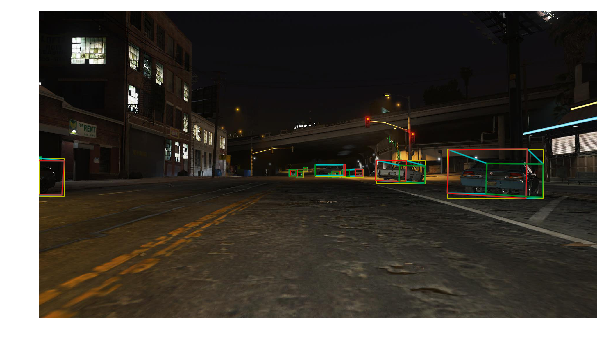

D:\generic-dataset\2018-03-30--10-33-22--578.jpg 2018-03-30--10-33-22--578
camera pos:  [1584.87194824219, 3782.66357421875, 34.7602806091309]
2D bbox: [[ 276.55640585  567.54577916]
 [ 219.58921572  523.39110746]]
2D bbox: [[ 1088.47011639   533.25471407]
 [ 1038.96102387   518.95445656]]


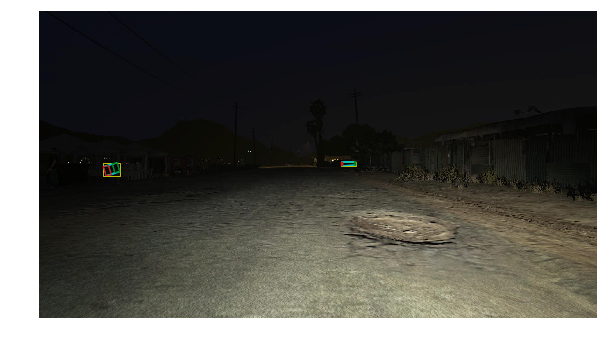

D:\generic-dataset\2018-03-07--17-59-09--468.jpg 2018-03-07--17-59-09--468
camera pos:  [1292.80859375, -2486.09399414062, 46.6009483337402]


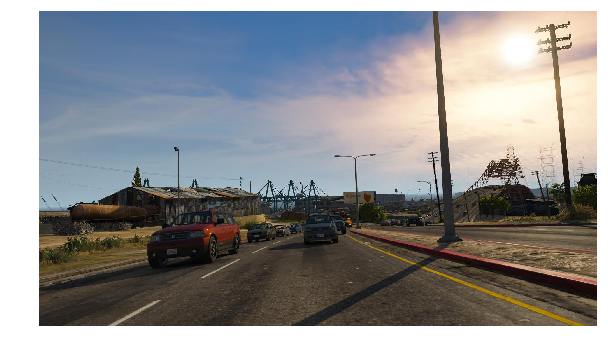

D:\generic-dataset\2018-03-30--08-56-05--565.jpg 2018-03-30--08-56-05--565
camera pos:  [1401.31384277344, 3513.44580078125, 35.7592277526855]
2D bbox: [[ 1744.13732173   545.48648462]
 [ 1686.47546487   517.02832128]]
2D bbox: [[ 1721.74077615   543.37934495]
 [ 1643.86385618   511.01278365]]


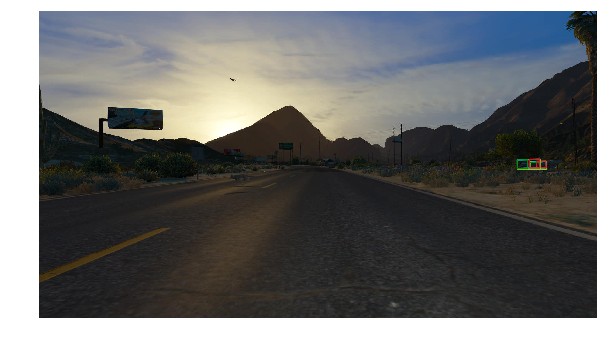

D:\generic-dataset\2018-03-07--17-31-15--873.jpg 2018-03-07--17-31-15--873
camera pos:  [1791.58581542969, -1545.46508789062, 112.330062866211]


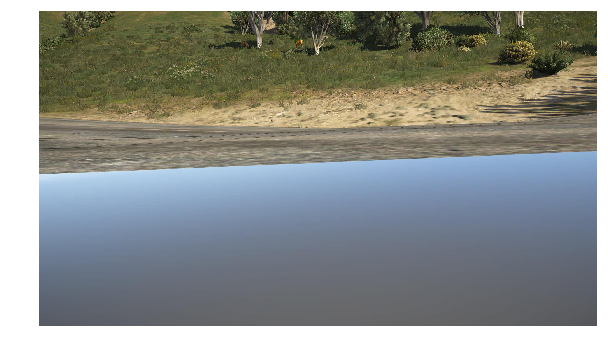

D:\generic-dataset\2018-03-30--01-19-35--418.jpg 2018-03-30--01-19-35--418
camera pos:  [503.112640380859, -1144.58911132812, 29.3621921539307]
2D bbox: [[ 1024.94326421   593.22150933]
 [  929.27644852   514.10245913]]
2D bbox: [[ 836.16268922  643.30540968]
 [ 474.2058357   525.19999929]]


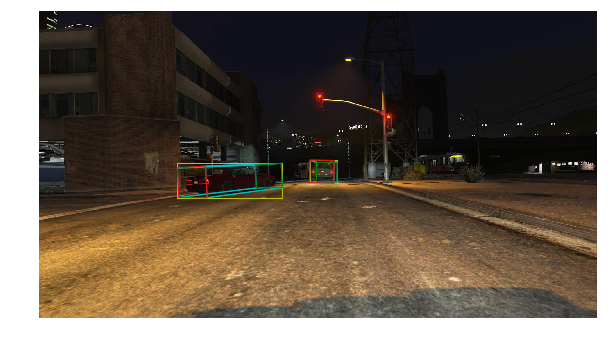

D:\generic-dataset\2018-03-07--17-45-53--607.jpg 2018-03-07--17-45-53--607
camera pos:  [1646.93920898438, -2218.86547851562, 109.723358154297]


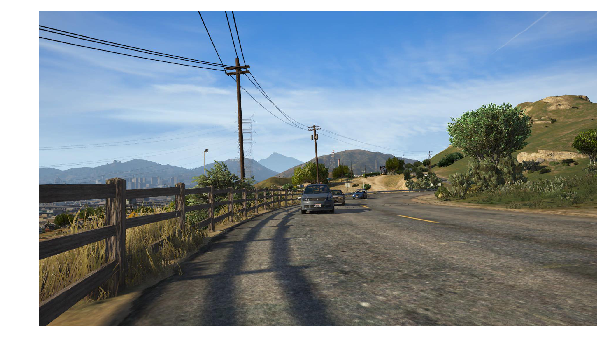

D:\generic-dataset\2018-03-30--02-27-10--006.jpg 2018-03-30--02-27-10--006
camera pos:  [246.018402099609, -647.145202636719, 39.9159889221191]
2D bbox: [[ 1915.00052274   663.12271539]
 [ 1905.7197865    652.01236427]]


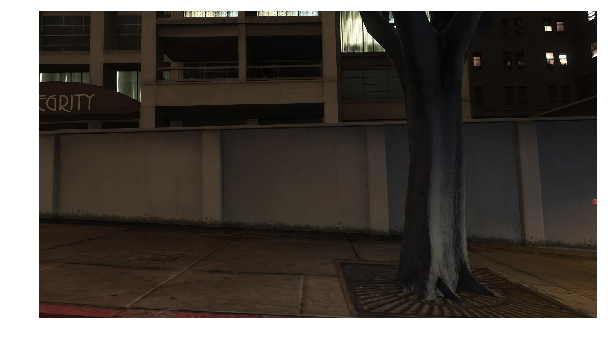

D:\generic-dataset\2018-03-07--17-40-49--625.jpg 2018-03-07--17-40-49--625
camera pos:  [1694.74853515625, -2098.43334960938, 106.587051391602]


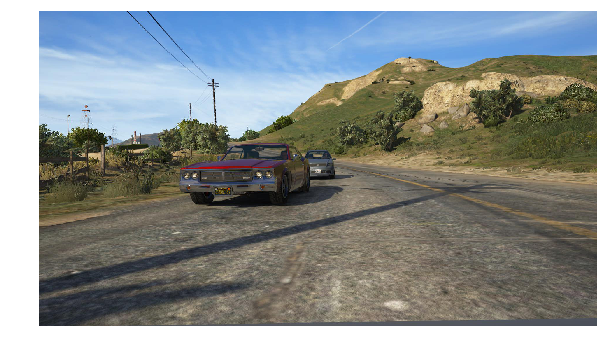

D:\generic-dataset\2018-03-30--06-35-41--511.jpg 2018-03-30--06-35-41--511
camera pos:  [1944.69982910156, 3916.6484375, 32.4275817871094]
2D bbox: [[ 1038.50645521   540.58656671]
 [ 1014.42862318   520.73709425]]


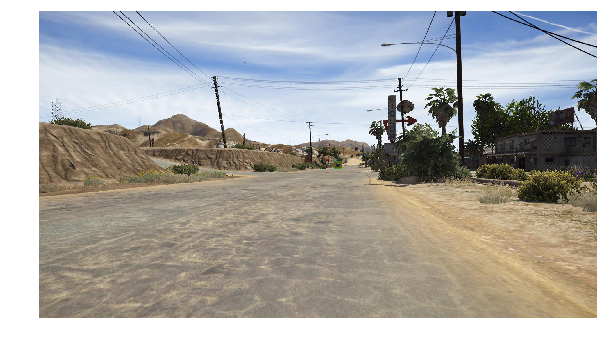

In [48]:
for file in files[260:280]:
    print(file, get_base_name(file))
    rgb_file = os.path.join(directory, '{}.jpg'.format(get_base_name(file)))
    depth_file = os.path.join(directory, '{}.png'.format(get_base_name(file)))
    if not os.path.exists(depth_file):
        depth_file = os.path.join(directory, '{}-depth.png'.format(get_base_name(file)))        
    json_file = os.path.join(directory, '{}.json'.format(get_base_name(file)))
    rgb = np.array(Image.open(rgb_file))
    depth = np.array(Image.open(depth_file))
    depth = depth / np.iinfo(np.uint16).max  # normalizing into NDC
    with open(json_file, mode='r') as f:
        data = json.load(f)
    #print(data)
    data['width'] = 1914  # not in jsons, but it is constant
    data['height'] = 1052  # not in jsons, but it is constant
    fig = plt.figure(figsize=(10, 7))
    draw3dbboxes(rgb, depth, data, fig)
    plt.show()